In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [37]:
C = 2
M = 2
EPSILON = 0.001

In [14]:
def get_init_fuzzy_mat(pixel_count):
    global C
    fuzzy_mat = np.zeros((C, pixel_count))
    for col in range(pixel_count):
        temp_sum = 0
        randoms = np.random.rand(C - 1, 1)
        for row in range(C - 1):
            fuzzy_mat[row, col] = randoms[row, 0] * (1 - temp_sum)
            temp_sum += fuzzy_mat[row, col]
        fuzzy_mat[-1, col] = 1 - temp_sum
    return fuzzy_mat

In [15]:
def get_centroids(data_array, fuzzy_mat):
    global M
    class_num, pixel_count = fuzzy_mat.shape[:2]
    centroids = np.zeros((class_num, 1))
    for i in range(class_num):
        fenzi = 0.
        fenmu = 0.
        for pixel in range(pixel_count):
            fenzi += np.power(fuzzy_mat[i, pixel], M) * data_array[0, pixel]
            fenmu += np.power(fuzzy_mat[i, pixel], M)
        centroids[i,0] = fenzi / fenmu
    return centroids

In [16]:
def eculidDistance(vectA, vectB):
    return np.sqrt(np.sum(np.power(vectA - vectB, 2)))
 
def eculid_distance(pixel_1, pixel_2):
    return np.power(pixel_1-pixel_2, 2)


In [17]:
def cal_fcm_function(fuzzy_mat, centroids, data_array):
    global M
    class_num, pixel_count = fuzzy_mat.shape[:2]
    target_value = 0.0
    for c in range(class_num):
        for p in range(pixel_count):
            target_value += eculid_distance(data_array[0,p], centroids[c,0])*np.power(fuzzy_mat[c,p], M)
    return target_value

In [18]:
 
def get_label(fuzzy_mat, data_array):
    pixel_count = data_array.shape[1]
    label = np.zeros((1,pixel_count))
 
    for i in range(pixel_count):
        if fuzzy_mat[0,i] > fuzzy_mat[1,i]:
            label[0,i] = 0
        else:
            label[0,i] = 255
    return label

In [19]:
def cal_fuzzy_mat(data_array, centroids):
    global M
    pixel_count = data_array.shape[1]
    class_num = centroids.shape[0]
    new_fuzzy_mat = np.zeros((class_num, pixel_count))
    for p in range(pixel_count):
        for c in range(class_num):
            temp_sum = 0.
            Dik = eculid_distance(data_array[0,p], centroids[c,0])
            for i in range(class_num):
                temp_sum += np.power(Dik/(eculid_distance(data_array[0,p], centroids[i,0])), (1/(M-1)))
            new_fuzzy_mat[c,p] = 1/temp_sum
    return new_fuzzy_mat

In [20]:
def fcm(init_fuzzy_mat, init_centroids, data_array):
    global EPSILON
    last_target_function = cal_fcm_function(init_fuzzy_mat, init_centroids, data_array)
    print("迭代次数 = 1, 目标函数值 = {}".format(last_target_function))
    fuzzy_mat = cal_fuzzy_mat(data_array, init_centroids)
    centroids = get_centroids(data_array, fuzzy_mat)
    target_function = cal_fcm_function(fuzzy_mat, centroids, data_array)
    print("迭代次数 = 2, 目标函数值 = {}".format(target_function))
    count = 3
    while count < 100:
        if abs(target_function-last_target_function) <= EPSILON:
            break
        else:
            last_target_function = target_function
            fuzzy_mat = cal_fuzzy_mat(data_array, centroids)
            centroids = get_centroids(data_array, fuzzy_mat)
            target_function = cal_fcm_function(fuzzy_mat, centroids, data_array)
            print("迭代次数 = {}, 目标函数值 = {}".format(count, target_function))
            count += 1
    return fuzzy_mat, centroids, target_function

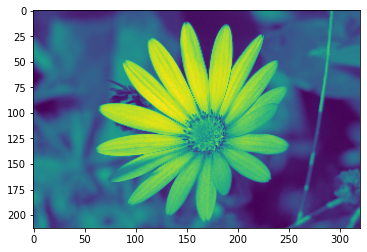

213 320
迭代次数 = 1, 目标函数值 = 194065166.24126366
迭代次数 = 2, 目标函数值 = 145426535.09343752
迭代次数 = 3, 目标函数值 = 145365325.52629596
迭代次数 = 4, 目标函数值 = 144502439.4419432
迭代次数 = 5, 目标函数值 = 135892230.76671115
迭代次数 = 6, 目标函数值 = 100101291.23679177
迭代次数 = 7, 目标函数值 = 64249975.193214715
迭代次数 = 8, 目标函数值 = 57471970.5211263
迭代次数 = 9, 目标函数值 = 56891049.155706495
迭代次数 = 10, 目标函数值 = 56812795.44158071
迭代次数 = 11, 目标函数值 = 56799576.02171894
迭代次数 = 12, 目标函数值 = 56797299.421910696
迭代次数 = 13, 目标函数值 = 56796909.41092474
迭代次数 = 14, 目标函数值 = 56796842.85276366
迭代次数 = 15, 目标函数值 = 56796831.51441528
迭代次数 = 16, 目标函数值 = 56796829.58440423
迭代次数 = 17, 目标函数值 = 56796829.25597504
迭代次数 = 18, 目标函数值 = 56796829.20011243
迭代次数 = 19, 目标函数值 = 56796829.19059894
迭代次数 = 20, 目标函数值 = 56796829.18896835
迭代次数 = 21, 目标函数值 = 56796829.188692786


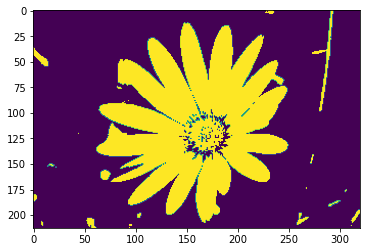

In [38]:
image = cv2.imread(r"E:\python\tuxiangchuli\cnn-registration-publish\img\10_14_s.jpg", cv2.IMREAD_GRAYSCALE)
#image = cv2.imread(r"E:\python\tuxiangchuli\cnn-registration-publish\img\10_14_s.jpg")

plt.imshow(image)
plt.show()
rows, cols = image.shape[:2]
print(rows,cols)
pixel_count = rows * cols
image_array = image.reshape(1, pixel_count)
# print(image_array[1])
# 初始模糊矩阵
init_fuzzy_mat = get_init_fuzzy_mat(pixel_count)
# 初始聚类中心
init_centroids = get_centroids(image_array, init_fuzzy_mat)
fuzzy_mat, centroids, target_function = fcm(init_fuzzy_mat, init_centroids, image_array)
label = get_label(fuzzy_mat, image_array)
new_image = label.reshape(rows, cols)
cv2.imwrite("fcm_result.jpg",new_image)
#im=new_image[:,:,::-1]
plt.imshow(new_image)
plt.show()
